# 인공지능과 가위바위보하기

In [280]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob



### 데이터 Resize :  32 x 32



In [281]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 이미지 데이터를 모두 32x32 사이즈로 바꾸어 저장합니다.
	target_size=(32,32)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
  
	return len(images)

In [282]:
train_path = '/content/drive/MyDrive/AIFFEL/Exp/05/train'

In [283]:
number_of_train = 0
number_of_train += resize_images(train_path+'/rock')
number_of_train += resize_images(train_path+'/scissor')
number_of_train += resize_images(train_path+'/paper')

214  images to be resized.
214  images resized.
204  images to be resized.
204  images resized.
204  images to be resized.
204  images resized.




### 데이터 불러오기



In [284]:
from keras.preprocessing.image import ImageDataGenerator

In [285]:
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

In [286]:
(x_train, y_train)=load_data(train_path, number_of_train)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (622, 32, 32, 3)
y_train shape: (622,)


라벨:  0


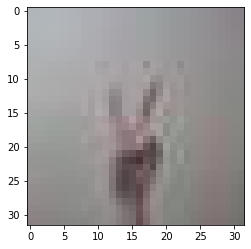

In [287]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])



### 딥러닝 네트워크 설계하기



In [288]:
n_channel_1=16
n_channel_2=32
n_dense=32

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 1152)              0         
                                                                 
 dense_75 (Dense)            (None, 32)              



### 딥러닝 네트워크 학습시키기



In [289]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3521
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0789 - accuracy: 0.4309
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 1.0381 - accuracy: 0.5289
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.9744 - accuracy: 0.6061
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.7058
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.7042
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.7299
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.7942
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.8103
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8441




### 얼마나 잘 만들었는지 확인하기 (테스트)



In [290]:
test_path = '/content/drive/MyDrive/AIFFEL/Exp/05/test'

In [291]:
number_of_test = 0
number_of_test += resize_images(test_path+'/rock')
number_of_test += resize_images(test_path+'/scissor')
number_of_test += resize_images(test_path+'/paper')

4  images to be resized.
4  images resized.
4  images to be resized.
4  images resized.
4  images to be resized.
4  images resized.


In [292]:
(x_test, y_test)=load_data(test_path, number_of_test)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (12, 32, 32, 3)
y_test shape: (12,)


라벨:  0


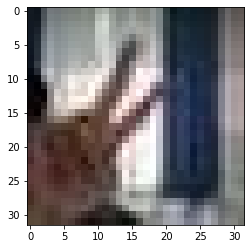

In [293]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [294]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 1.1827 - accuracy: 0.5833 - 111ms/epoch - 111ms/step
test_loss: 1.1826896667480469 
test_accuracy: 0.5833333134651184




### 더 좋은 네트워크 만들어보기



1) 하이퍼 파라미터 수정

In [295]:
n_channel_1=32
n_channel_2=64
n_dense=64

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 2304)              0         
                                                                 
 dense_77 (Dense)            (None, 64)              

In [296]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.3907
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0660 - accuracy: 0.5225
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.9689 - accuracy: 0.6093
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.8114 - accuracy: 0.6881
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7717
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7830
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8891
Epoch 8/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.9019
Epoch 9/20
20/20 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.9148
Epoch 10/20
20/20 [==============================] - 0s 3ms/step - loss: 0.2458 - accuracy: 0.9309
Epoch 11/20
20/20 [

In [297]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 4.6720 - accuracy: 0.5000 - 109ms/epoch - 109ms/step
test_loss: 4.671985149383545 
test_accuracy: 0.5


2) Layer 추가

In [298]:
n_channel_1=16
n_channel_2=32
n_channel_3=64
n_dense=64

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 2, 2, 64)       

In [299]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
20/20 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.4116
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4904
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0568 - accuracy: 0.4309
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0029 - accuracy: 0.4839
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.7122
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.7090
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.7444
Epoch 8/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7621
Epoch 9/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7781
Epoch 10/20
20/20 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.8039
Epoch 11/20
20/20 [

In [300]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 0.7782 - accuracy: 0.7500 - 137ms/epoch - 137ms/step
test_loss: 0.7781791687011719 
test_accuracy: 0.75




3) 전이학습 :  ResNet



In [301]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [302]:
IMG_SHAPE = (32, 32, 3)
base_model = ResNet50(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model.trainable = False
 
model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(3, activation='softmax')
        ])

model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_10  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_81 (Dense)            (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [303]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 13ms/step - loss: 1.1673 - accuracy: 0.3376
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 1.1292 - accuracy: 0.3473
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0983 - accuracy: 0.3553
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0780 - accuracy: 0.3875
Epoch 5/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0734 - accuracy: 0.4180
Epoch 6/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0658 - accuracy: 0.4357
Epoch 7/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0593 - accuracy: 0.4068
Epoch 8/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0367 - accuracy: 0.4598
Epoch 9/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0260 - accuracy: 0.4662
Epoch 10/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0241 - accuracy: 0.5000

In [304]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 1s - loss: 2.7073 - accuracy: 0.3333 - 813ms/epoch - 813ms/step
test_loss: 2.707324266433716 
test_accuracy: 0.3333333432674408




---



# 회고



*   **데이터의 중요성**



양적으로도 질적으로도 열악한 데이터를 신경망 학습에 사용한다면 아무리 훌륭한 신경망을 설계했다하더라도 원하는 성과를 얻기 쉽지 않다는 것을 느꼈다. 그리고 적절하게 구비된 데이터를 어떻게 전처리하고 정규화할 것인지 정하는 일 또한 매우 중요한 부분이라고 생각한다.


> ImageDataGenerator를 활용한 데이터 증강 기법이 있다는 것을 뒤늦게 알았다. (다음 기회에 활용해보겠다.)



*   **'Test accuracy'를 끌어올리기 위한 시도**





*1. 하이퍼 파라미터 수정* ❌
> Convolutional Layer 및 Dense Layer의 차원 수를 다양하게 변경해보았지만 큰 소득이 없었다.



*2. Layer 추가* ⭕
> Convolutional Layer와 Pooling Layer를 각각 한 층씩 더 추가함으로써 Test accuracy를 '0.75' 수준으로 높일 수 있었다.



*3. 전이학습* ❌
> 저명한 pre-trained 신경망인 ResNet을 활용해보았지만 원하는 결과를 얻지 못했다. Test accuracy가 '0.333'인 것을 미루어 짐작했을 때 학습 자체가 제대로 수행되지 않은 것으로 판단된다.

